In [1]:
delta_m1545 = -1.545
delta_4455 = 4.455
delta_4955 = 4.955
delta_13455 = 13.455
d_m1545 = '-1.545'
d_4455 = '4.455'
d_4955 = '4.955'
d_13455 = '13.455'

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [3]:
import sys
sys.path.append('../../Main')
from dset_helpers import load_KZ_QMC_uncorr_data_from_batches,data_given_param
from stag_mag import calculate_stag_mag

# Load Data

In [8]:
Exp_data = data_given_param(15,-1.545,16)
shots = np.shape(Exp_data)[-1]
Lx = 16
Exp_data = np.reshape(Exp_data,(Lx**2,shots)).T
print(np.shape(Exp_data))

(1000, 256)


In [7]:
df = pd.read_csv('./../../Data/QMC_Data/kz_qmc_samples/avg_observables.csv', sep=',')
deltas = np.array(df["delta"])
energies = np.array(df["energy"])
e_errors = np.array(df["energy_error"])
chks = np.array(df["chk"])
chk_errors = np.array(df["chk_error"])

In [9]:
QMC_data = load_KZ_QMC_uncorr_data_from_batches(-1.545,1000)
print(np.shape(QMC_data))

(1000, 256)


# Calclate Staggered Magnetization from Data

In [10]:
Lx,Ly = 16,16

In [11]:
QMC_data_stagmags = calculate_stag_mag(Lx,Ly,QMC_data)

In [12]:
Exp_data_stagmags = calculate_stag_mag(Lx,Ly,Exp_data)

In [14]:
deltas = np.arange(-1.545,13.5,0.5)
qmc_stagmags = []
qmc_vars = []
exp_stagmags = []
all_all_exp_stagmags = np.zeros((1000,len(deltas)))
exp_vars = []

for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    Exp_data = data_given_param(15,delta,Lx)
    Exp_data = np.reshape(Exp_data,(Lx**2,1000)).T
    all_exp_stagmags,_,Exp_data_stagmag,expvar = calculate_stag_mag(Lx,Ly,Exp_data)
    exp_stagmags.append(Exp_data_stagmag)
    exp_vars.append(expvar)
    all_all_exp_stagmags[:,i] = all_exp_stagmags

# Plot Stag Mags from Data & QMC Sims

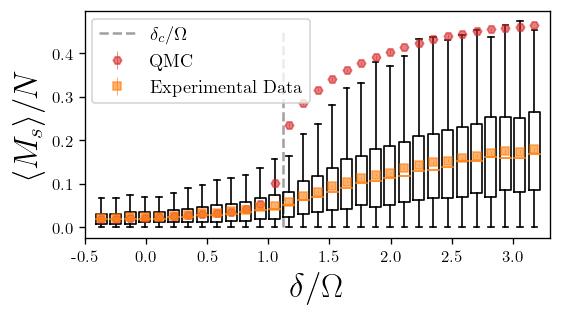

In [23]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})

fig = plt.figure(1,figsize=(5,2.5), dpi=120, facecolor='w', edgecolor='k')
plt.errorbar(deltas/4.24, chks, yerr=chk_errors, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3',label="QMC")
plt.errorbar(deltas/4.24, exp_stagmags, yerr=np.sqrt(np.array(exp_vars))/np.sqrt(1000), marker='s', markerfacecolor='C1', markeredgecolor='C1', markersize=5, linewidth=0.6, alpha=0.6, linestyle='None', color='C1',label="Experimental Data")

plt.boxplot(abs(all_all_exp_stagmags),positions=deltas/4.24,showfliers = False,widths=0.09)
plt.ylabel('$\\langle M_{s} \\rangle/N$',fontsize=20)
plt.xlabel('$\\delta/\\Omega$',fontsize=20)
plt.xticks(np.arange(-0.5,3.51,0.5),np.arange(-0.5,3.51,0.5))
plt.xlim(-0.5,3.3)
plt.vlines(4.765/4.24,0.001,0.45,linestyle='--',color='grey',alpha=0.75,label ='$\\delta_c/\\Omega$')

plt.legend(loc='center', bbox_to_anchor=(0.25, 0.78),fontsize=11)


plt.show()